## Caricamento dei Dati e Visualizzazione

Una delle applicazioni più rilevanti ed impattanti dell'algebra lineare numerica c'è sicuramente quella dell'approssimazione dei dati. Infatti, è un problema molto comune in praticamente tutti gli ambiti della scienza quella di utilizzare dei dati *misurati* facenti riferimento ad un particolare fenomeno, per addestrare un modello matematico ad effettuare previsioni **future** di come il fenomeno si comporterà, oppure per riempire *buchi* nei dati, dovuti a mancate misurazioni o semplicemente a tempi molto lunghi di acquisizione.

Un recente esempio di applicazioni di queste tecniche si sono viste durante l'epidemia di Covid-19, dove gruppi di virologi si *sfidavano* a colpi di modelli di previsione, per stimare come si sarebbe evoluta l'epidemia nei mesi a seguire. O, ancora, modelli di previsione dai dati si utilizzano al giorno d'oggi per stimare l'impatto di tecnologie emergenti sulle emissioni di anidride carbonica, e di come l'incremento di tale gas nell'atmosfera stia portando ad un chiaro innalzamento delle temperature globali.

Per poter studiare come questi modelli vengono implementati, bisogna prima imparare a caricare in memoria e visualizzare le informazioni contenute in questi dati. 

La libreria Python di riferimento in questo caso è `pandas`, che può essere semplicemente scaricata tramite comandi

```
pip install pandas
```

o, equivalentemente,

```
conda install pandas
```

E' fuori dagli scopi di questo corso uno studio approfondito sull'utilizzo di `pandas` per l'analisi dei dati. Per gli interessati, rimando alla pagina ufficiale della libreria https://pandas.pydata.org.

## Caricamento dei dati in memoria
Di seguito in questa sezione, prenderemo come esempio il dataset del numero di contagiati da Covid-19, disponibile su Kaggle all'indirizzo: https://www.kaggle.com/datasets/imdevskp/corona-virus-report. In particolare, ci interesserà il dataset `day_wise.csv`, presente nella cartella scaricabile da Kaggle, e inserito per semplicità nel percorso relativo `./data/day_wise.csv` del progetto corrente.

Andiamo quindi ad importare `pandas` e a caricare il dataset in memoria.

In [1]:
import pandas as pd

# Set data path
data_path = "./data/day_wise.csv"

# Load data
data = pd.read_csv(data_path)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB
None


Di questi dati, siamo interessati a visualizzare, ad esempio, l'andamento dei nuovi casi al variare del tempo. Estraiamo quindi le colonne corrispettive e convertiamo la data in un formato più semplice da utilizzare (ovvero un numero intero che descrive il giorno a partire dal giorno zero del primo contagio).

In [2]:
# Estriamo data (x) e nuovi casi (y)
x = pd.to_datetime(data['Date'])
y = data["New cases"]

# Convertiamo la data (x) in un intero incrementale
x = (x - x.min()).dt.days

Per finire, è buona norma convertire i valori degli array `x` e `y` in `ndarray`, così da poter utilizzare su di essi le funzioni `numpy` che abbiamo imparato nelle precedenti lezioni.

In [3]:
import numpy as np

# Convertiamo x e y in numpy array
x = np.array(x)
y = np.array(y)
print(f"Shape of x: {x.shape}, Shape of y: {y.shape}.")

Shape of x: (188,), Shape of y: (188,).


## Visualizzazione
Una volta caricati i dati in memoria, possiamo passare alla visualizzazione. Per farlo, utilizziamo semplicemente `matplotlib` come abbiamo imparato a fare nella relativa lezione.

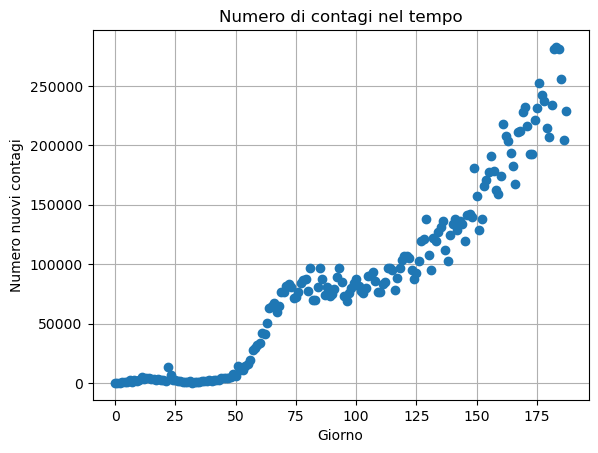

In [4]:
import matplotlib.pyplot as plt

# Visualizzazione
plt.plot(x, y, 'o')
plt.grid()
plt.xlabel("Giorno")
plt.ylabel("Numero nuovi contagi")
plt.title("Numero di contagi nel tempo")
plt.show()

Da questo grafico si osservano chiaramente due proprietà chiave tipiche di praticamente qualsiasi collezione di dati, e che saranno utili nella prossima parte del corso:

1. I dati seguono l'andamento di una **curva** relativamente complessa, ma con un pattern chiaramente riconoscibile.
2. I dati **NON** sono disposti in maniera precisa lungo la curva, ma mostrano un comportamento casuale: sono affetti da *rumore*.

Il compito di un modello di approssimazione è quello di utilizzare degli algoritmi di algebra lineare per definire un modello in grado di recuperare il comportamento **generale** della curva dei dati, ignorando però il rumore che è frutto semplicemente di fluttuazioni casuali. In pratica, vogliamo recuperare il comportamento **medio** dei dati.

Se siamo in grado di ottenere questo risultato, possiamo aspettarci che la curva dei dati manterrà un comportamento simile almeno per i successivi giorni, e possiamo utilizzare la nostra approssimazione per prevedere l'andamento futuro dei dati.
Inoltre, studiando le proporietà matematiche della funzione approssimante (ad esempio, la sua derivata prima, derivata seconda, ecc.) possiamo ricavare alcune importanti proprietà dei dati considerati, come ad esempio se l'andamento attuale è in crescita/decrescita, o se la crescita/descrescita sta accellerando/decellerando. Tali proprietà sono particolarmente utili per organizzare strategie di risposta ai contagi, oppure per verificare se una data strategia applicata sta funzionando o meno.